In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#panggil data dengan pandas
data = pd.read_csv('/content/drive/MyDrive/clean_text.csv')
data.head()

,clean_text,rating
0,bagus mantap sesui pesan,5
1,bagus sesuai foto,4
2,okkkkk mantaaaaaaapppp goood,5
3,bagus sesuai,4
4,bima,1


In [ ]:
data

In [ ]:
data = data[['clean_text','rating']]
data = data.dropna()

In [ ]:
data.shape

(106420, 2)

In [ ]:
data.isnull().sum()

clean_text    0
rating        0
dtype: int64

In [ ]:
# mapping rating menjadi class sentimen
#rating 4-5 : 1 (positif)
#rating 3 : 0 (netral)
#rating 1-2 : 2 (negatif)
data['sentimen'] = data['rating']
data['sentimen'].replace({5: 1, 4: 1, 3: 0, 2:2, 1:2}, inplace=True)
data.head()

,clean_text,rating,sentimen
0,bagus mantap sesui pesan,5,1
1,bagus sesuai foto,4,1
2,okkkkk mantaaaaaaapppp goood,5,1
3,bagus sesuai,4,1
4,bima,1,2


In [ ]:
pd.value_counts(data['rating'])

5    82465
4    10567
1     6897
3     4329
2     2162
Name: rating, dtype: int64

In [ ]:
pd.value_counts(data['sentimen'])

1    93032
2     9059
0     4329
Name: sentimen, dtype: int64

In [ ]:
#split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.clean_text,data.sentimen, test_size=0.3, random_state=42)

In [ ]:
x_train

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

max_words = 5000
max_len = 500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)

sequences = tok.texts_to_sequences(x_train)
X_train = sequence.pad_sequences(sequences,maxlen=max_len)

sequences = tok.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)

In [ ]:
Y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Activation
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
def LSTM_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,100,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(10,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = LSTM_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          500000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
FC1 (Dense)                  (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 33        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0     

In [ ]:
history = model.fit(X_train,Y_train,batch_size=128,epochs=10,
          callbacks = [ModelCheckpoint(filepath='/content/drive/MyDrive/Lazada_LSTM.h5',monitor='val_loss',mode='min',save_best_only=True)],
          validation_split=0.2)

Epoch 1/10
466/466 [==============================] - 921s 2s/step - loss: 0.3367 - accuracy: 0.8944 - val_loss: 0.2736 - val_accuracy: 0.9079
Epoch 2/10
466/466 [==============================] - 857s 2s/step - loss: 0.2476 - accuracy: 0.9172 - val_loss: 0.2512 - val_accuracy: 0.9164
Epoch 3/10
466/466 [==============================] - 855s 2s/step - loss: 0.2131 - accuracy: 0.9301 - val_loss: 0.2365 - val_accuracy: 0.9233
Epoch 4/10
466/466 [==============================] - 853s 2s/step - loss: 0.1878 - accuracy: 0.9386 - val_loss: 0.2251 - val_accuracy: 0.9298
Epoch 5/10
466/466 [==============================] - 851s 2s/step - loss: 0.1669 - accuracy: 0.9462 - val_loss: 0.2203 - val_accuracy: 0.9348
Epoch 6/10
466/466 [==============================] - 844s 2s/step - loss: 0.1508 - accuracy: 0.9522 - val_loss: 0.2176 - val_accuracy: 0.9366
Epoch 7/10
466/466 [==============================] - 844s 2s/step - loss: 0.1377 - accuracy: 0.9576 - val_loss: 0.2133 - val_accuracy: 0.9407

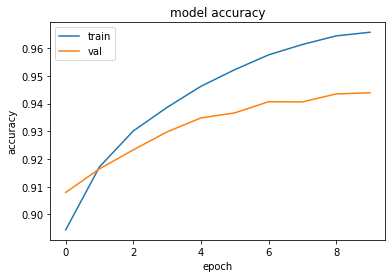

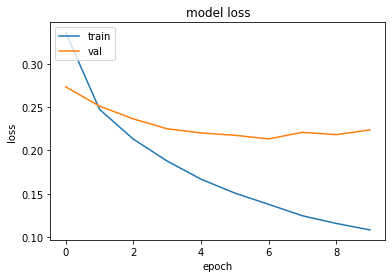

In [ ]:
import matplotlib.pyplot as plt


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Lazada_LSTM.h5')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          500000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
FC1 (Dense)                  (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 33        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0     

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_prediksi = model.predict(X_test)
Y_prediksi = np.argmax(y_prediksi, axis=1)

In [ ]:
print(classification_report(y_test,Y_prediksi))

              precision    recall  f1-score   support

           0       0.70      0.43      0.54      1287
           1       0.96      0.98      0.97     27936
           2       0.80      0.76      0.78      2703

    accuracy                           0.94     31926
   macro avg       0.82      0.72      0.76     31926
weighted avg       0.93      0.94      0.94     31926



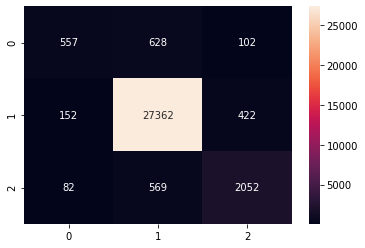

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, Y_prediksi)
sns.heatmap(cm, annot=True, fmt='g')